# Intro to `pandas`

We'll explore the Pandas package for simple data handling tasks using geoscience data examples. 

## Basic Pandas

Introduces the concept of a `DataFrame` in Python. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels.

In [1]:
import pandas as pd

The most common data structure in Pandas is the `DataFrame`. A 2D structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays). Columns are usually labelled as well using strings.

An easy way to think about a `DataFrame` is if you imagine it as an Excel spreadsheet.

Let's define one using a numpy array:

In [15]:
arr =  [[2.13, 'sandstone'],
        [3.45, 'limestone'],
        [2.45, 'shale']]
arr

[[2.13, 'sandstone'], [3.45, 'limestone'], [2.45, 'shale']]

Make a `DataFrame` from `arr`

In [16]:
df = pd.DataFrame(arr, columns=['velocity', 'lithology'])
df

,velocity,lithology
0,2.13,sandstone
1,3.45,limestone
2,2.45,shale


Accessing the data is a bit more complex than in the numpy array cases but for good reasons

In [17]:
df['id'] = [101, 102, 103]
df = df.set_index('id')
df.head()

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone
103,2.45,shale


In [18]:
df.loc[101:102]  # Inlusive slice, unlike anything else in Python or NumPy

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone


In [19]:
df.iloc[0:1]  # Works like NumPy

,velocity,lithology
id,,
101,2.13,sandstone


In [20]:
df['lithology']

id
101    sandstone
102    limestone
103        shale
Name: lithology, dtype: object

In [21]:
df.loc[0]

KeyError: 0

In [22]:
df.loc[df['velocity'] < 3]

,velocity,lithology
id,,
101,2.13,sandstone
103,2.45,shale


In [23]:
df.loc[df['velocity'] < 3, 'lithology']


id
101    sandstone
103        shale
Name: lithology, dtype: object

## Adding data

Add more data (row wise)

In [24]:
df.loc[3] = [2.6, 'shale']
df

,velocity,lithology
id,,
101,2.13,sandstone
102,3.45,limestone
103,2.45,shale
3,2.60,shale


Add a new column with a "complete" list, array or series

In [25]:
df['second_new_column'] = ["x", "y", "z", "a"]
df

,velocity,lithology,second_new_column
id,,,
101,2.13,sandstone,x
102,3.45,limestone,y
103,2.45,shale,z
3,2.60,shale,a


## Reading a CSV

Pandas also reads files from disk in tabular form ([here](https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/io.html)'s a list of all the formats that it can read and write). A very common one is CSV, so let's load one!

Conveniently, you can give `pandas` the CSV in a URL or a file path:

In [16]:
import pandas as pd

df = pd.read_csv("https://geocomp.s3.amazonaws.com/data/Panoma_Field_Permian.csv")
df.head()

,Facies,Formation,Well Name,Depth,GR,DeltaPHI,PHIND,ILD,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,9.9,11.915,21.281390,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,14.2,12.565,20.989399,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,14.8,13.050,20.701413,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,13.9,13.115,20.417379,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,13.5,13.300,19.678863,3.4,1,0.915


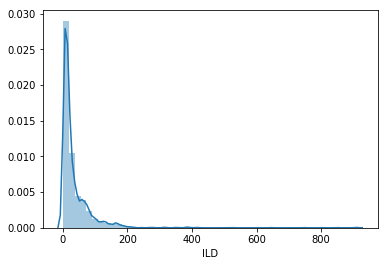

In [28]:
import seaborn as sns
import numpy as np

sns.distplot(df.ILD)

### Exercise

- Create a new column called `ILD_log10` and store in it the log<sub>10</sub> of the values in column `ILD`.
- Make a 'distplot' of the new column.
- Check the Pandas documentation [here](http://pandas.pydata.org/pandas-docs/version/0.22/api.html#data-manipulations) and look for a way to determine how many different facies are part of the `DataFrame`.

In [31]:
import numpy as np

df['ILD_log10'] = np.log10(df["ILD"])

In [31]:
df.groupby('Facies').size()

Facies
1    259
2    738
3    615
4    184
5    217
6    462
7     98
8    498
9    161
dtype: int64

# Inspecting the `DataFrame`

Using the `DataFrame` with well log information loaded before, we can make a summary using the `describe()` method of the `DataFrame` object

In [32]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Facies,Depth,GR,DeltaPHI,PHIND,ILD,PE,NM_M,RELPOS,log_ILD
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,1615.500000,1615.500000,4.422030,2875.824567,66.135769,3.559642,13.483213,35.890418,3.725014,1.498453,0.520287,1.285438
std,933.142361,933.142361,2.504243,131.006274,30.854826,5.228948,7.698980,55.469745,0.896152,0.500075,0.286792,0.483689
min,0.000000,0.000000,1.000000,2573.500000,13.250000,-21.832000,0.550000,0.887364,0.200000,1.000000,0.010000,-0.051898
25%,807.750000,807.750000,2.000000,2791.000000,46.918750,1.163750,8.346750,9.671656,3.100000,1.000000,0.273000,0.985500
50%,1615.500000,1615.500000,4.000000,2893.500000,65.721500,3.500000,12.150000,17.736735,3.551500,1.000000,0.526000,1.248874
75%,2423.250000,2423.250000,6.000000,2980.000000,79.626250,6.432500,16.453750,42.215227,4.300000,2.000000,0.767250,1.625469
max,3231.000000,3231.000000,9.000000,3122.500000,361.150000,18.600000,84.400000,912.010839,8.094000,2.000000,1.000000,2.960000


## Better descriptions

We can define a Python dictionary to relate facies with the integer label on the `DataFrame`

In [27]:
facies_dict = {1:'sandstone', 2:'c_siltstone', 3:'f_siltstone', 4:'marine_silt_shale',
               5:'mudstone', 6:'wackestone', 7:'dolomite', 8:'packstone', 9:'bafflestone'}

Let's add a new column with the name version of the facies. There is a `replace()` method on DataFrames and Series, and it takes a dictionary for what to replace with what. So we could also achieve the same thing by passing our dictionary to that.

In [28]:
df["s_Facies"] = df["Facies"].replace(facies_dict)

In [11]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,ILD,s_Facies
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,4.613176,f_siltstone
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,4.581419,f_siltstone
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,4.549881,f_siltstone
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,4.518559,f_siltstone
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,4.436086,f_siltstone


If you didn't happen to know about the `replace` method (like me!) then you could also make the new column from a list comprehension that does a dictionary lookup for each item in `df.Facies`:

In [12]:
df["s_Facies"] = [facies_dict.get(x, x) for x in df.Facies]

## Adding more data to the `DataFrame`

We'd like to augment the DataFrame with some new data, based on some of the existing data.

In [3]:
def calc_phi_rhob(phind, deltaphi):
    """
    Compute phi_RHOB from phi_ND and delta-phi.
    """
    return 2 * (phind/100) / (1 - deltaphi/100) - deltaphi/100

In [4]:
def calc_rhob(phi_rhob, matrix='sandstone', fluid='brine'):
    """
    Computes RHOB from phi_RHOB using some typical values for rho_matrix,
    and rho_fluid. See wiki.aapg.org/Density-neutron_log_porosity
    """
    matrixes = {
        'shale':      2350,
        'sandstone':  2650,
        'limestone':  2710,
        'dolomite':   2880,
        'anyhydrite': 2980,
        'salt':       2030,
    }

    fluids = {
        'water':       1000,
        'brine':       1100,
        'heavy oil':   1000,
        'light oil':    800,
        'lng':          650,
    }
    
    rho_matrix = matrixes.get(matrix.lower(), 2650)
    rho_fluid = fluids.get(fluid.lower(), 1100)
    return rho_matrix * (1 - phi_rhob) + rho_fluid * phi_rhob

### Exercise

- Create a new column called `RHOB` and use the functions `calc_phi_rhob` and `calc_rhob` with the appropriate arguments to produce to fill its values. Assume everything is sandstone.
- Check the distribution of the new RHOB values. Some of them seem rather small. Use `df.loc[...]` (with a condition in place of the ellipsis) to make a copy of the DataFrame that only includes the values above some reasonable number.
- **Stretch goal:** create a function that processes a row, taking `row` as its only argument. Then use `row.Facies` to get the matrix and use that to make the calculation for each row, returning it. Then you can use `df.apply()` with `axis=1` to apply your function to every row and make a new column. USe this dictionary to look up the matrix type:

      matrix_types = {1:'sandstone', 2:'sandstone', 3:'sandstone',
                      4:'shale', 5:'shale',
                      6:'limestone', 8:'limestone', 9:'limestone',
                      7:'dolomite'
                     }

In [17]:
phi_rhob = calc_phi_rhob(df.PHIND, df.DeltaPHI)
df['RHOB'] = calc_rhob(phi_rhob)

In [33]:
matrix_types = {1:'sandstone', 2:'sandstone', 3:'sandstone',
                4:'shale', 5:'shale',
                6:'limestone', 8:'limestone', 9:'limestone',
                7:'dolomite',
               }
    
def get_rhob(row):
    matrix = matrix_types.get(row.Facies, 'sandstone')
    phi_rhob = calc_phi_rhob(row.PHIND, row.DeltaPHI)
    return calc_rhob(phi_rhob, matrix=matrix)

df['RHOB'] = df.apply(get_rhob, axis=1)

In [18]:
df.describe()

,Facies,Depth,GR,DeltaPHI,PHIND,ILD,PE,NM_M,RELPOS,RHOB
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,3.559642,13.483213,35.890418,3.725014,1.498453,0.520287,2273.219505
std,2.504243,131.006274,30.854826,5.228948,7.698980,55.469745,0.896152,0.500075,0.286792,254.764237
min,1.000000,2573.500000,13.250000,-21.832000,0.550000,0.887364,0.200000,1.000000,0.010000,11.204082
25%,2.000000,2791.000000,46.918750,1.163750,8.346750,9.671656,3.100000,1.000000,0.273000,2183.880699
50%,4.000000,2893.500000,65.721500,3.500000,12.150000,17.736735,3.551500,1.000000,0.526000,2335.788622
75%,6.000000,2980.000000,79.626250,6.432500,16.453750,42.215227,4.300000,2.000000,0.767250,2434.134789
max,9.000000,3122.500000,361.150000,18.600000,84.400000,912.010839,8.094000,2.000000,1.000000,2802.871147


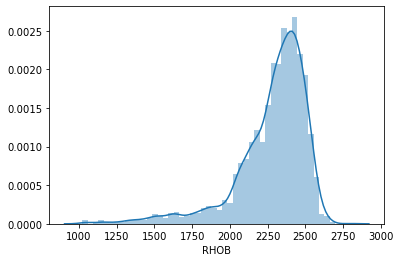

In [25]:
sns.distplot(df.RHOB)

In [20]:
df = df.loc[df.RHOB > 1000]

## Visual exploration of the data

We can easily visualize the properties of each facies and how they compare using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

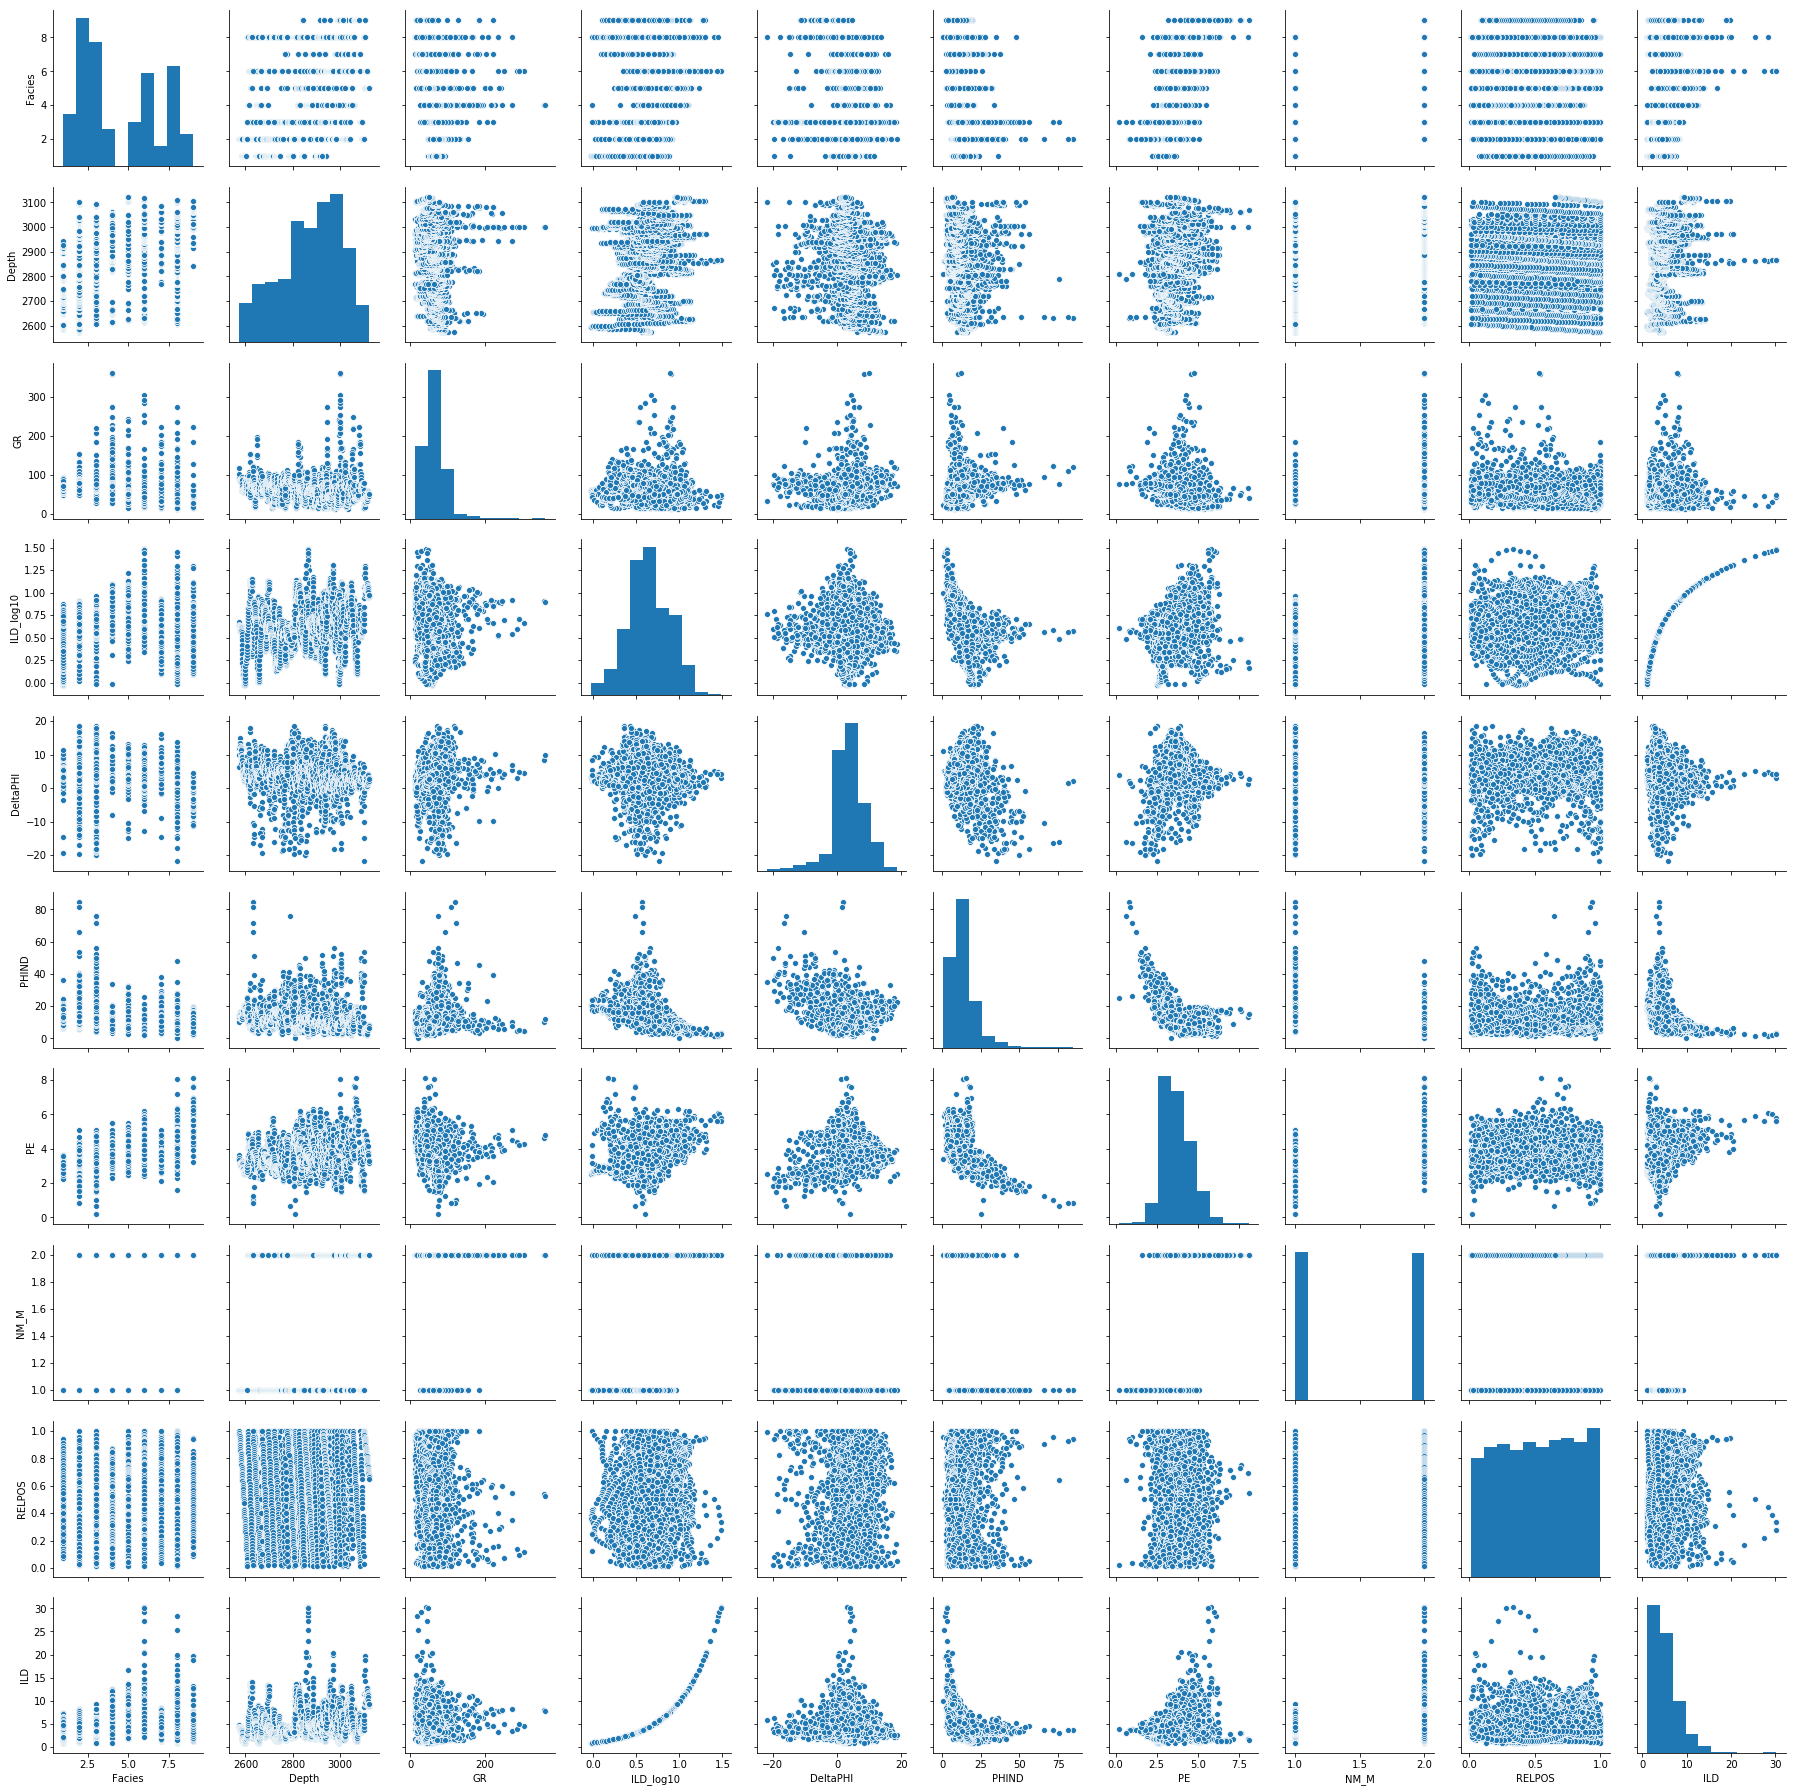

In [13]:
import seaborn as sns

sns.pairplot(df)

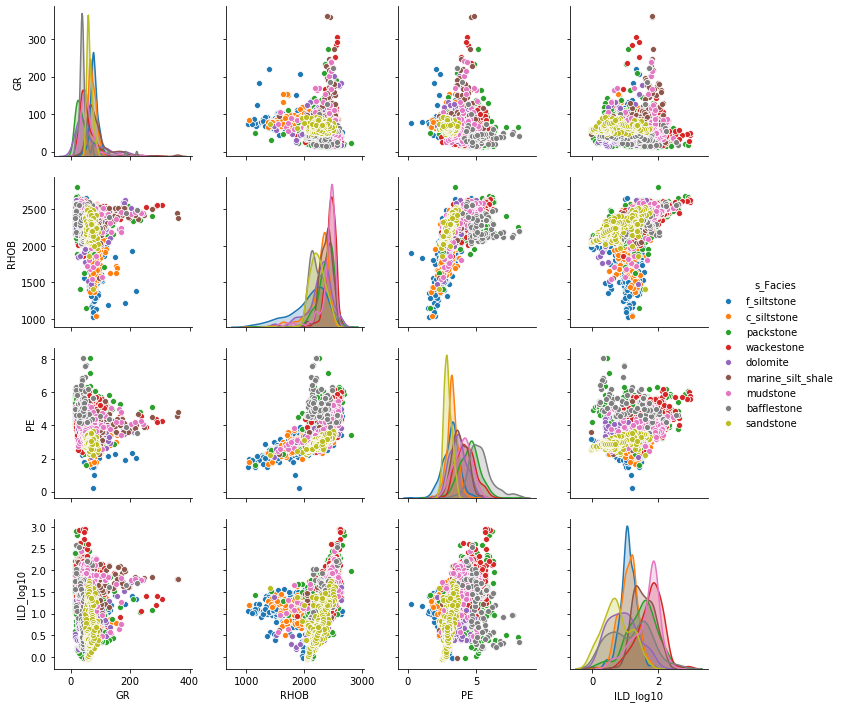

In [32]:
sns.pairplot(df,
             hue="s_Facies",
             vars=['GR','RHOB','PE','ILD_log10'])

We can have a lot of control over all of the elements in the pair-plot by using the `PairGrid` object.

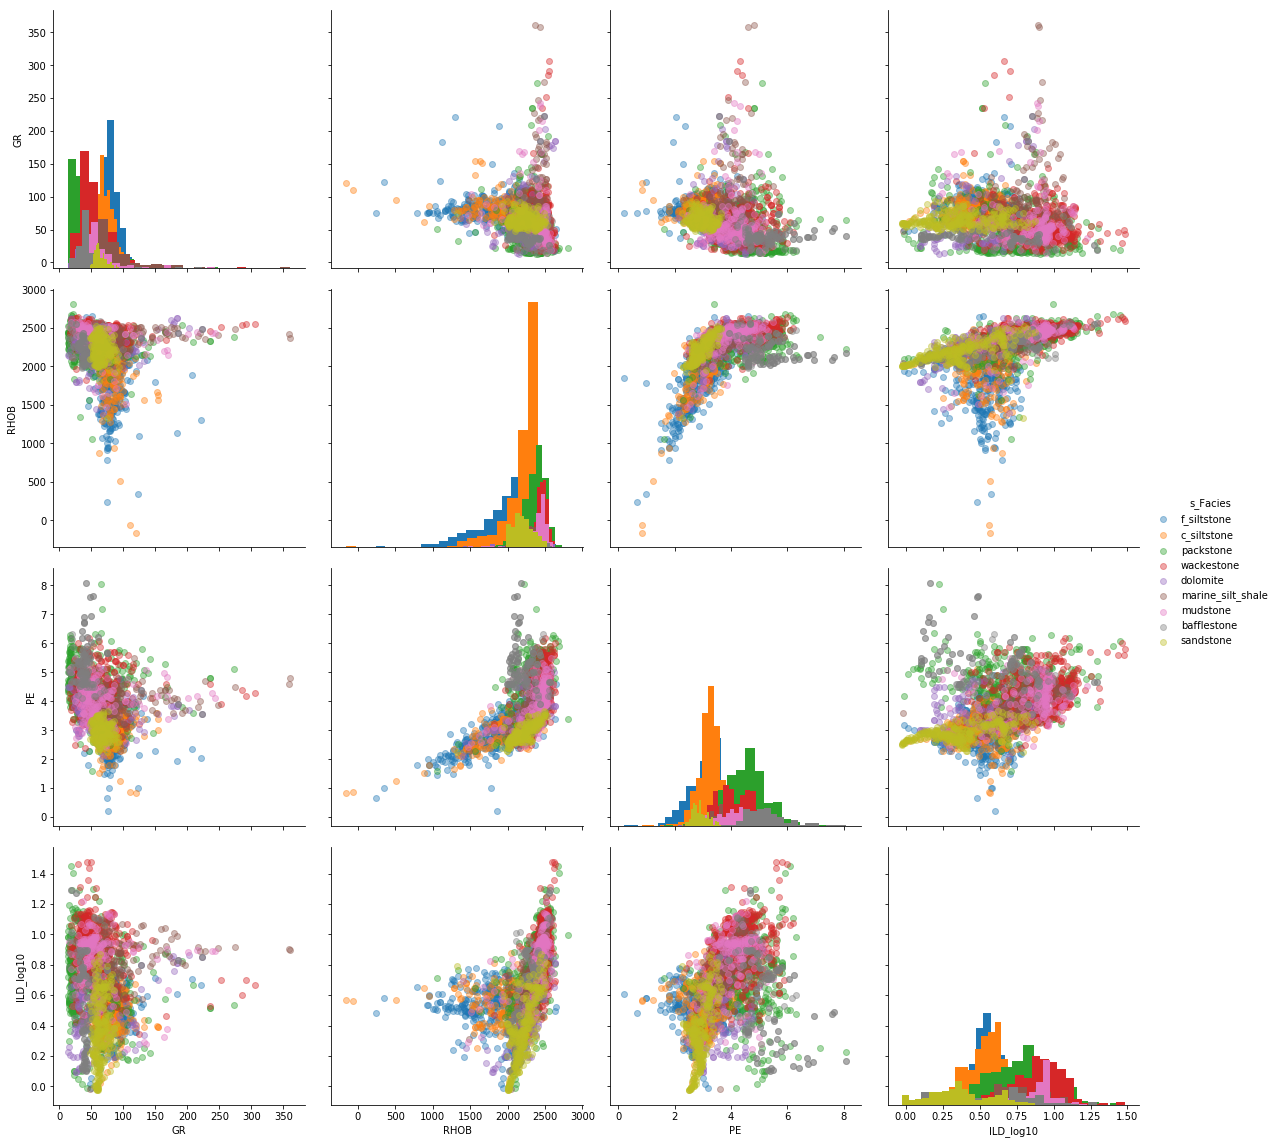

In [19]:
import matplotlib.pyplot as plt

g = sns.PairGrid(df, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], height=4)

g.map_upper(plt.scatter, alpha=0.4)  
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)  
g.add_legend()

It is very clear that it's hard to separate these facies in feature space. Let's just select three facies and using Pandas, select the rows in the `DataFrame` that contain information about those facies 

In [20]:
selected = ['f_siltstone', 'bafflestone', 'wackestone']

dfs = df[df['s_Facies'].isin(selected)]

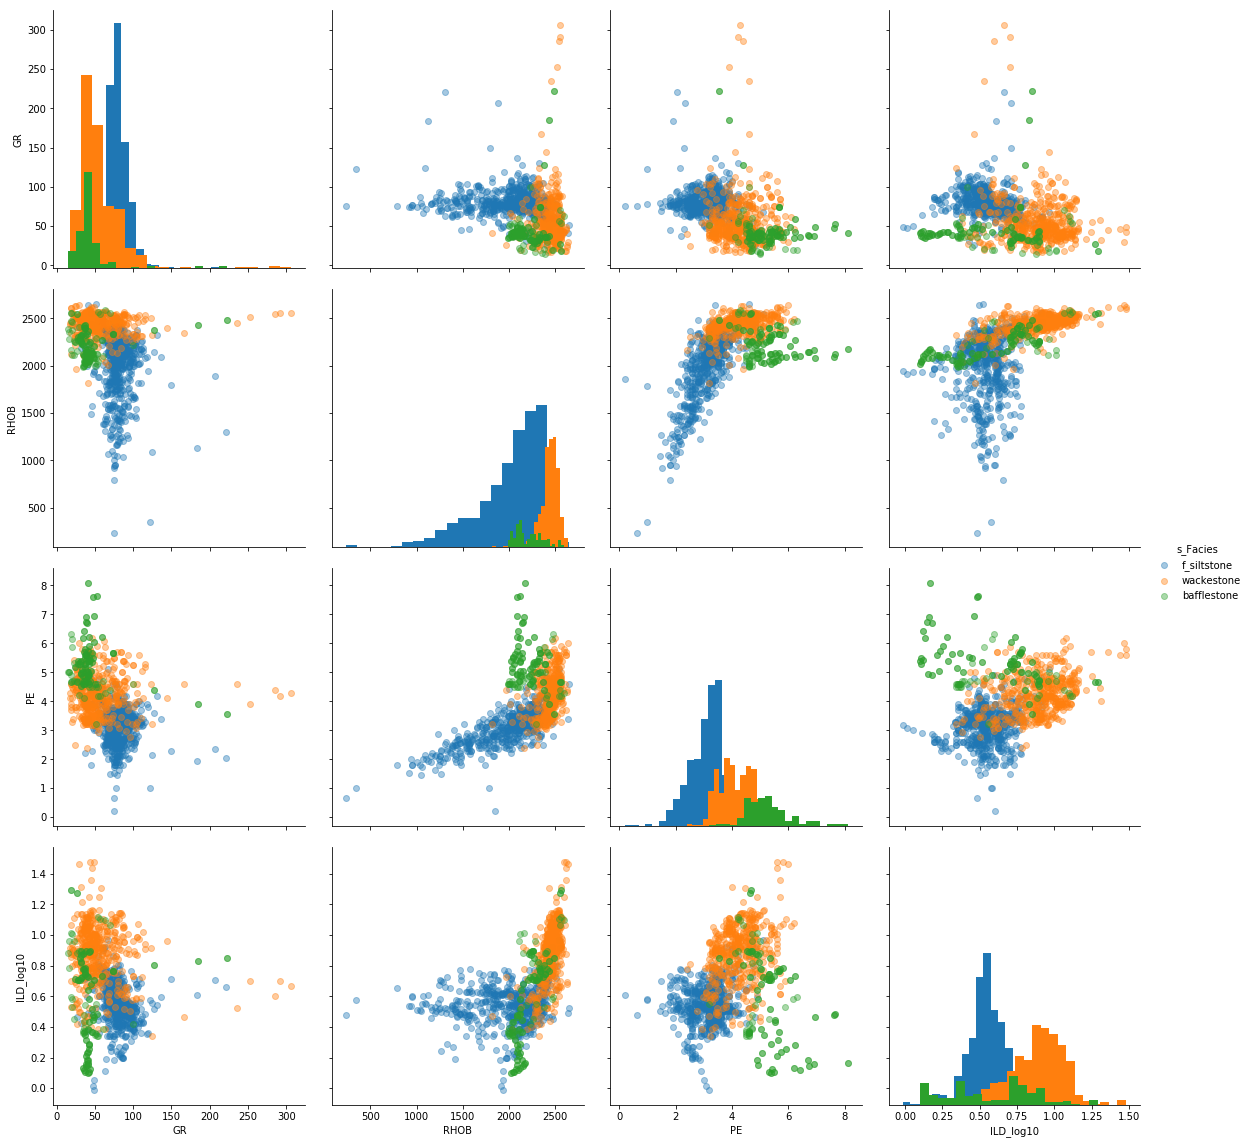

In [21]:
g = sns.PairGrid(dfs, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], height=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist, bins=20)
g.add_legend()

In [ ]:
dfs = dfs.sort_values(['Well Name', 'Depth'])

In [31]:
dfs.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,ILD,RHOB,s_Facies
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,4.613176,2376.951554,f_siltstone
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,4.581419,2401.030769,f_siltstone
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,4.549881,2388.742254,f_siltstone
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,4.518559,2376.684495,f_siltstone
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,4.436086,2365.351156,f_siltstone


In [32]:
dfs.to_csv("../data/training_DataFrame_processed.csv")

----

## Dealing with time series

Pandas is awesome for handling time series such as production data -- anything with times or dates as a key parameter.

Check out [`Pandas_for_time_series`](Pandas_for_time_series.ipynb) next.

<hr />

<p style="color:gray">©2019 Agile Geoscience. Licensed CC-BY.</p>